# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

## **Results**
Using PCA and t-SNE to detect clusters in cars, we identify 3 main types of cars to streamline advertising budgets and market to customers.
1. Muscle cars like the Chevy Impala, that faded out in 1979 as a result of the 1979 Oil Crisis, to be marketed towards young men and older men wanting to relive the exciting aesthetic of the 70s.
2. Subcompact cars like the Ford Fiesta, made for and marketable to the urban and economical customer without a large family.
3. Mid-sized cars like the Chevy Nova, classic 70s style, but big enough to take your kids with you.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [161]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [162]:
# Loading the data
#data = pd.read_csv("auto-mpg.csv")
data=pd.read_csv("https://github.com/jesusina/clustering_PCA/blob/main/auto-mpg.csv?raw=true")

### **Data Overview**

- Observations
- Sanity checks




In [163]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

*   There are 398 different car models, each of which is described in 6 columns.
*   3 of these columns - mpg, displacement, and acceleration - are floats, while the other 3 - cylidners, weight, and model year - are integers. There are no categorical variables.
*  Fortunately, no missing values to deal with.

## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [165]:
import copy

In [166]:
data_full=copy.deepcopy(data)
data.drop(columns = ["car name"], inplace = True)

In [167]:
data_full.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [168]:
data_full.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


For some reason, horsepower is bring read as a string, when it clearly has use to use as a number.  

In [169]:
data['horsepower']=pd.to_numeric(data['horsepower'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


We note that horsepower now has 6 missing values.

In [170]:
data[data['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


For our missing value treatment, we'll fill in the missing horsepower with the average.  

In [171]:
data['horsepower'].fillna(value = data['horsepower'].mean(), inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


Our dataframe is now adequately preprocessed.

mpg
Skew : 0.46


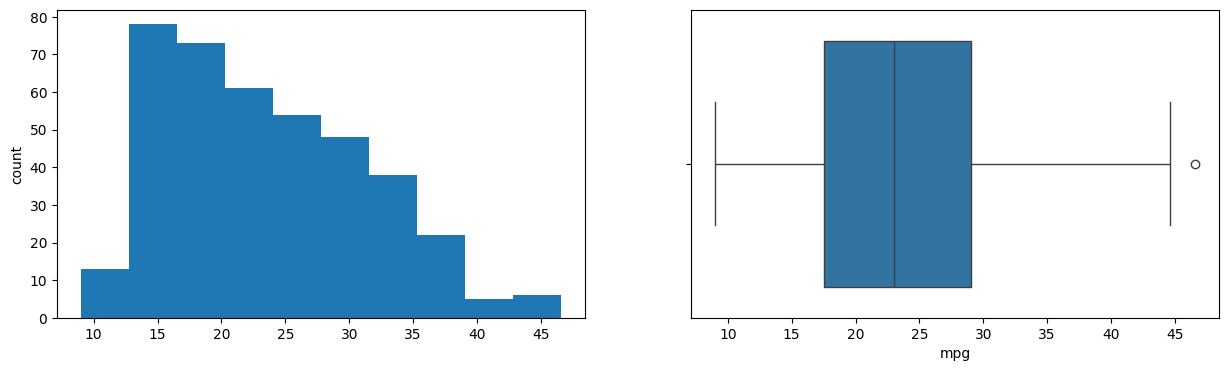

cylinders
Skew : 0.53


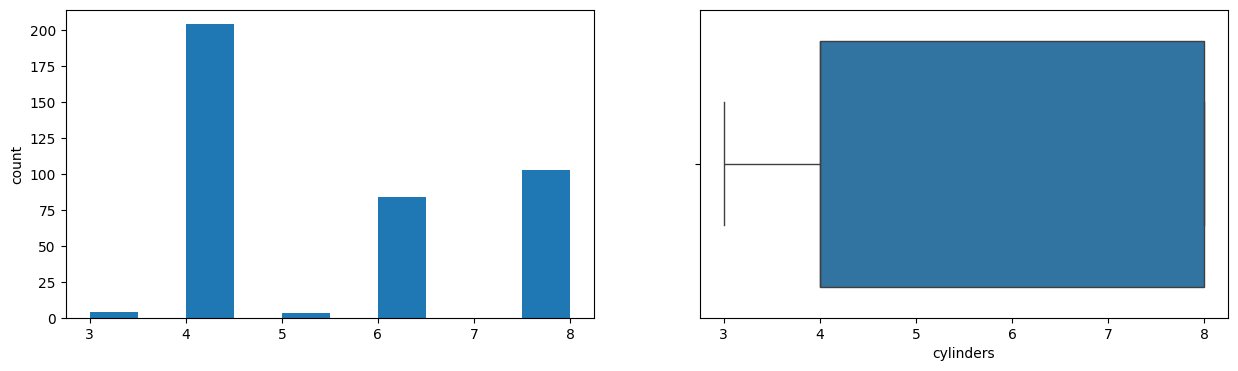

displacement
Skew : 0.72


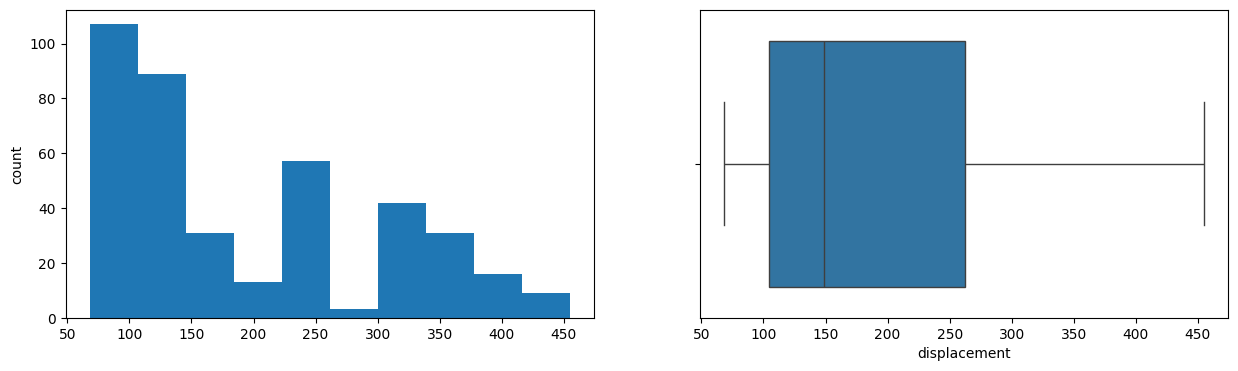

horsepower
Skew : 1.1


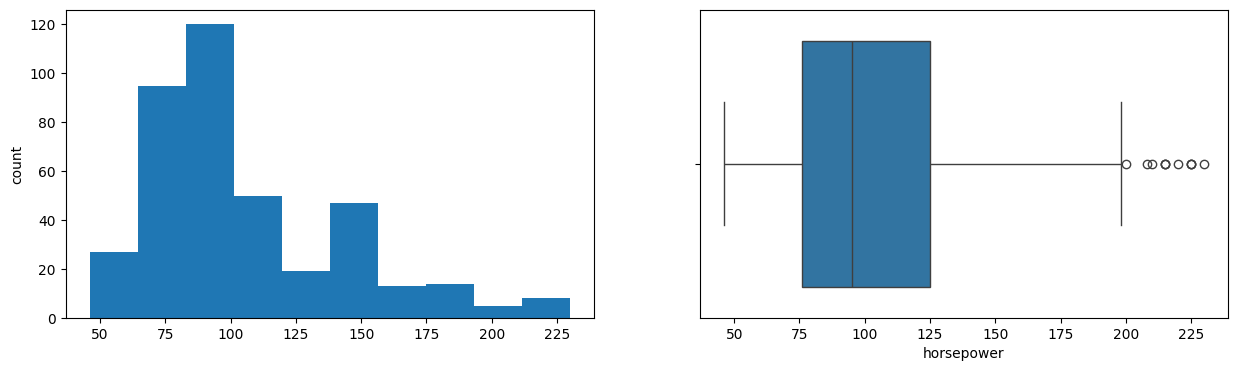

weight
Skew : 0.53


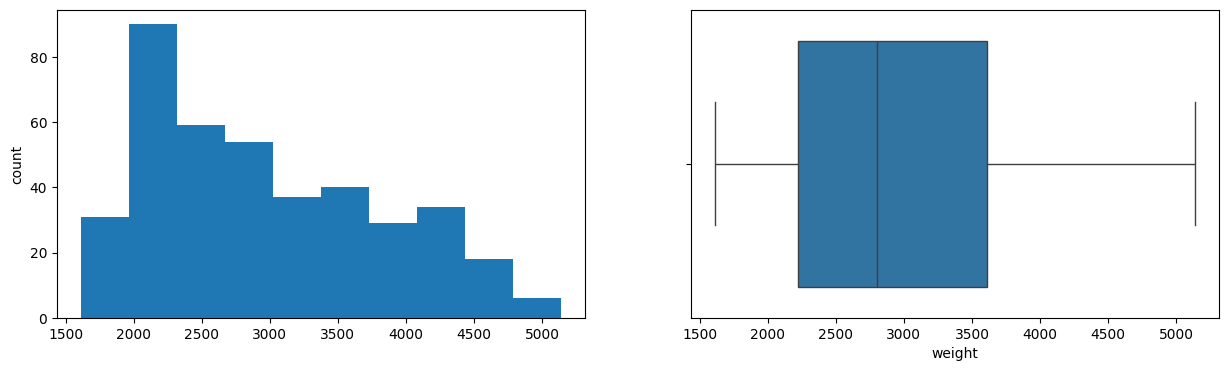

acceleration
Skew : 0.28


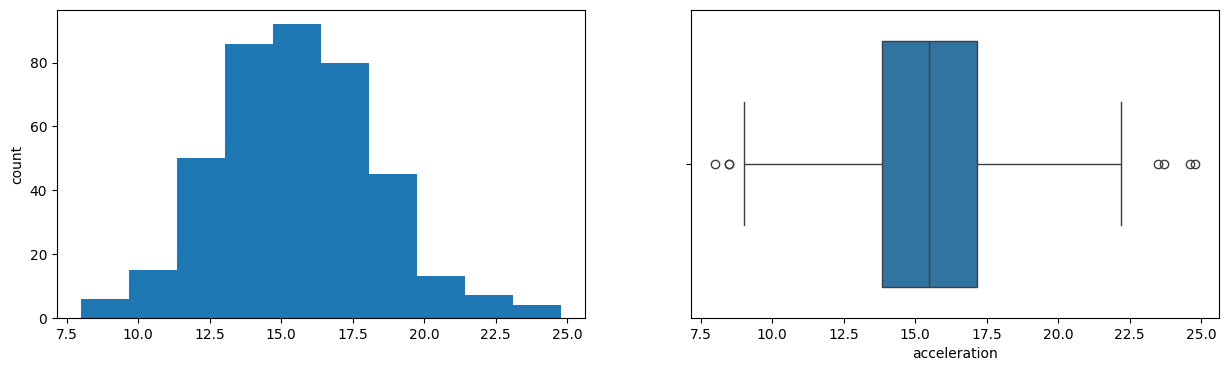

model year
Skew : 0.01


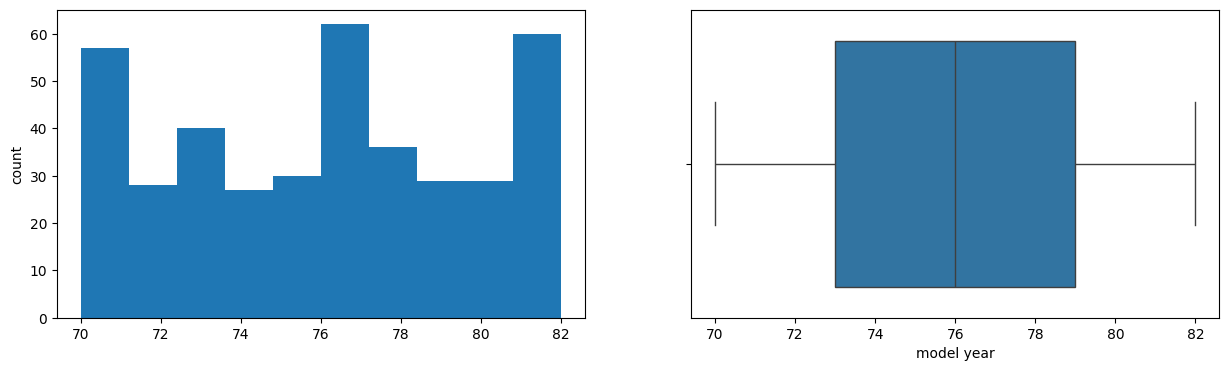

In [172]:


result = data.select_dtypes(include = 'number')#find numerical columns

cont_cols = list(result)#make a list

for col in cont_cols:#for each col

    print(col)

    print('Skew :',round(data[col].skew(),2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

**Observations: **
* Model years were fairly evently distributed between 1970 and 1982
* Acceleration stands out as the only attribute reasonably modeled by a Gaussian/normal curve
* Most data had a positive skew, including the mpg, horsepower, weight, and displacement. This is perhaps unsurprising, as these are all likely correlated features. Heavier cars have larger displacement engines.  The surprise is that the mpg would have the same skew, given that mpg and car weight/engine displacement would be expected to be inverse.  Let's look at the correlations.

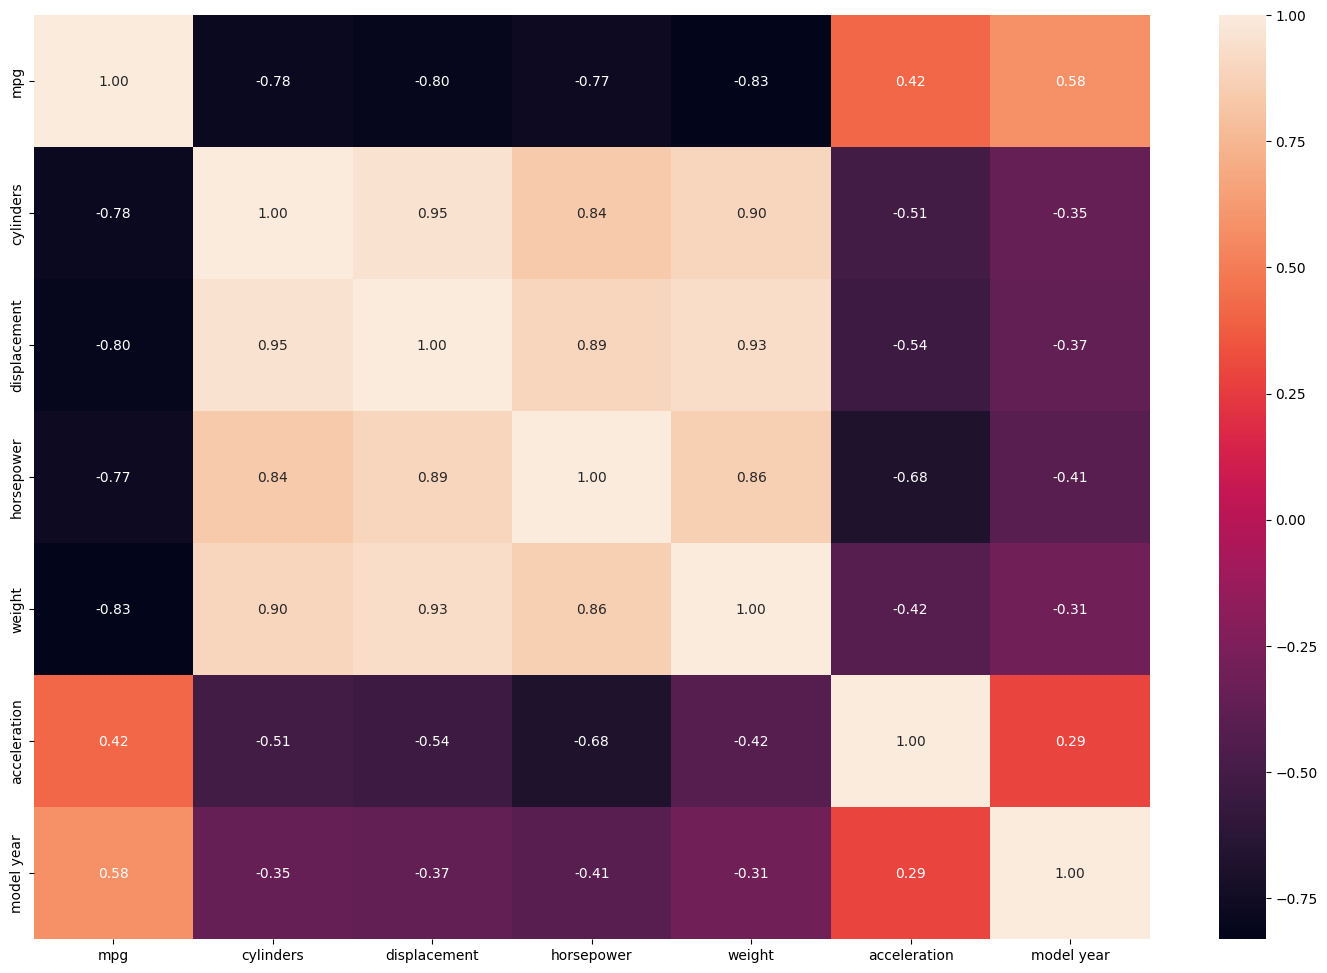

In [173]:
plt.figure(figsize = (18, 12))

sns.heatmap(data.corr(numeric_only = True), annot = True, fmt = '0.2f')

plt.show()

**Observations**:
* mpg is indeed negatively correlated with # cylinders, engine displacement, horsepower and weight, as expected.  
* Number of cylinders, horsepower, engine displacement, and weight are all correlated with each other, unsurprisingly.
* There is a mystery why acceleration is *negatively* correlated with horsepower, until we realize that acceleration is given in an kind of inverse manner: the 0-60mph time.  Therefore, *smaller* acceleration numbers* correspond to *faster* cars (which have bigger engines with more horsepower)
* Model year is reasonably correlated with mpg, which is interesting, as 1979 set off the Oil Crisis that did not subside until 1982. Let's explore this:

<Axes: xlabel='model year', ylabel='mpg'>

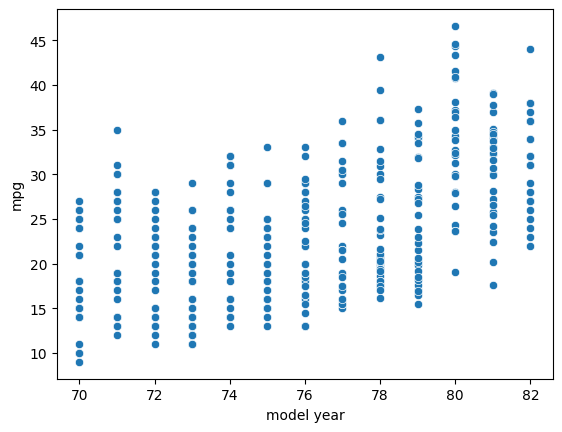

In [174]:
sns.scatterplot(x=data['model year'], y=data['mpg'])

A simple scatterplot seems to uphold this, though it's obviously not the best choice of visualization.  Let's get a boxplot here:

<Axes: xlabel='model year', ylabel='mpg'>

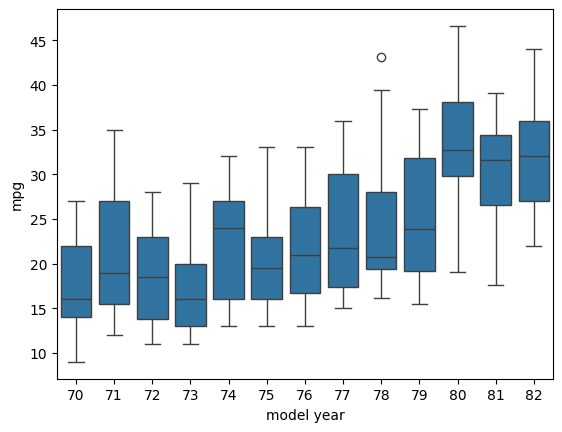

In [175]:
sns.boxplot(x=data['model year'], y=data['mpg'])

<Axes: xlabel='model year', ylabel='horsepower'>

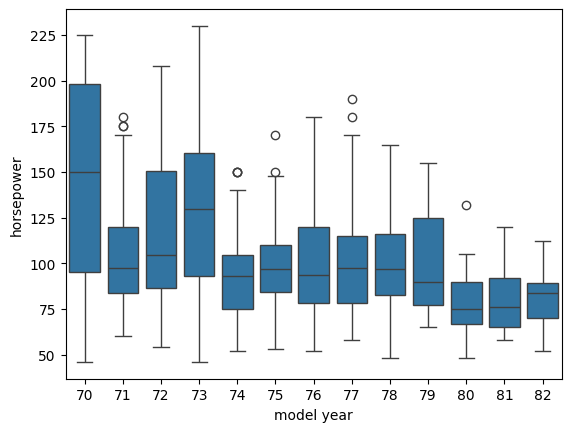

In [176]:
sns.boxplot(x=data['model year'], y=data['horsepower'])

Upward trend: confirmed! Vehicles were progressively made less powerful to improve fuel economy. Let's see if cars were also made lighter.

<Axes: xlabel='model year', ylabel='weight'>

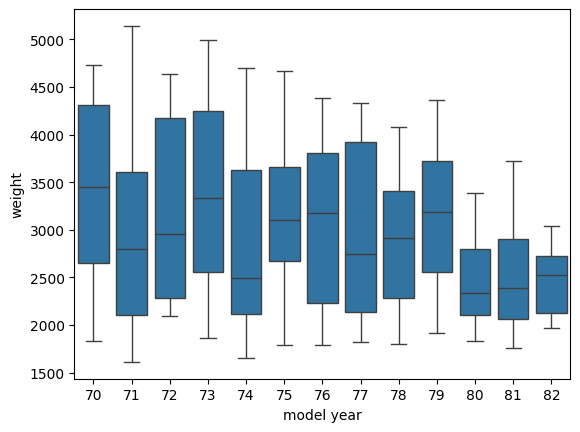

In [177]:
sns.boxplot(x=data['model year'], y=data['weight'])

<Axes: xlabel='model year', ylabel='acceleration'>

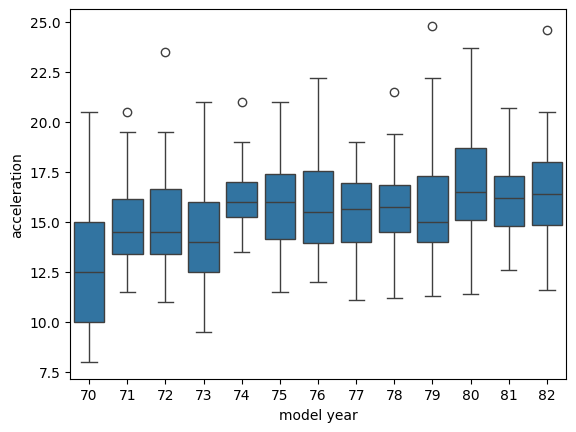

In [178]:
sns.boxplot(x=data['model year'], y=data['acceleration'])

All categories related to fuel economy - mpg, horsepower, and weight - had dramatic changes in 1980, the very first year after the 1979 Oil Crisis.  An interesting side effect is that cars barely slowed down as a result of economizing the engine outputs, since the car weights dropped so dramatically.  The following plot demonstrates that horsepower and gas mileage are just simply negatively correlated, but in fact appear to be inversely related.  

Plot also illustrates that powerful, gas guzzling cars were especially more common in the earlier years and more economical cars in the later years of data set.

<Axes: xlabel='horsepower', ylabel='mpg'>

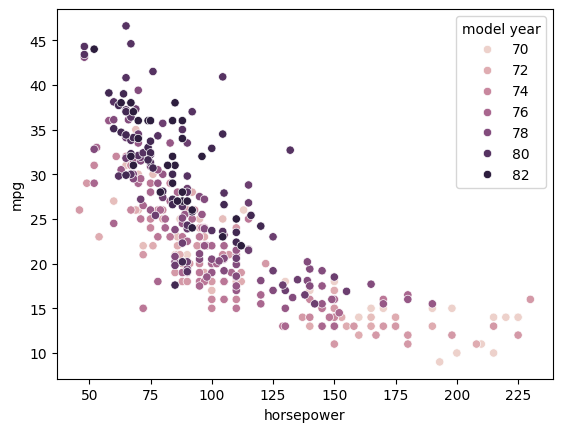

In [179]:
sns.scatterplot(data = data, x=data['horsepower'], y=data['mpg'], hue='model year')

### **Summary Statistics**

In [180]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**


*   mpg ranges from 9 to 46.6, with middle between 17.5 and 29
*   number of cylinders ranges from 3 to 8
*  displacement ranges from 68 to 455, with middle between 104 and 262
* most cars were 104±38 hp, but the positive skew brought by the half dozen outliers, meant that the mean was far above the median
* most cars weighed 2900 ± 847 lbs
* acceleration is 15.6 ± 2.76s (0-60mph time)
* model year ranges from 1970 to 1982



### **Scaling the data**

In [181]:
scaler = StandardScaler()
#data.select_dtypes(include='object')
data_scaled = scaler.fit_transform(data)

In [182]:
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

In [183]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]
print("Max number of principal components", n)

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

Max number of principal components 7


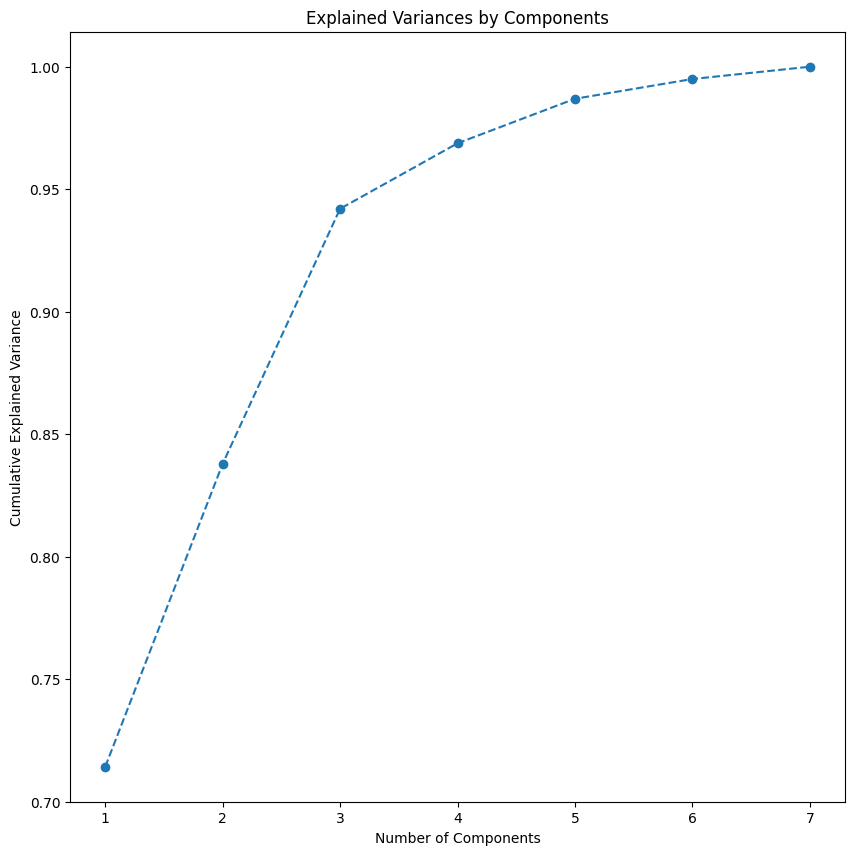

In [184]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, n+1), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [185]:
# Find the least number of components that can explain more than 80% variance
sum = 0

for ix, i in enumerate(exp_var1):

    sum = sum + i

    if(sum>0.80):
        print("Number of PCs that explain at least 70% variance: ", ix + 1)
        break

Number of PCs that explain at least 70% variance:  2


In [186]:
cols = ['PC1', 'PC2', 'PC3']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:3], 2), index = data_scaled.columns, columns = cols)
pc1

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


#### **Interpret the coefficients of the first three principal components from the DataFrame**

**Observations:**

* The first component (far and away the most relevant) is essentially one combo variable to account for cylinders, displacement, horsepower, weight, and mpg.  Given that these were all strongly correlated, it makes sense that PCA reduces them to a single dimension.  Acceleration, notably, does not make much of an appearance here.  This is surprising, until we recall our prior analysis showing that as car engines were made more economical in response to the 1979 Oil Crisis, that acceleration was essentially unchanged, since the vehicle weights were made that much lighter at the same time.
* The second component, which should be noted as explaining only 12% of the variance, a dramatic dip compared to the 71% of the first, is mostly model year.  
*The third component is the acceleration, which we noted, was almost entirely independent of both year and engine size, when the co-movement of engine size and weight was considered.  

#### **Visualize the data in 2 dimensions using the first two principal components**



In [187]:
cols = ['PC1', 'PC2']
pca2 = PCA(n_components = 2, random_state = 1)
data_pca = pca2.fit_transform(data_scaled)
transformed_data = pd.DataFrame(data_pca,  columns = cols)
#print(transformed_data)

<Axes: xlabel='PC2', ylabel='PC1'>

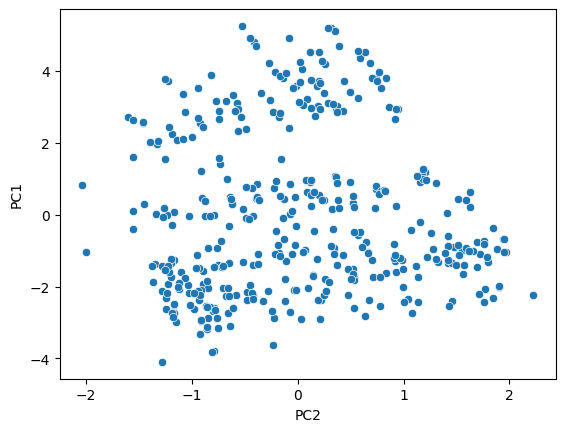

In [188]:
sns.scatterplot(transformed_data, y='PC1', x='PC2')

**Observations:**
Data seem more or less scattered along these two dimensions.  The only notable artifact is the emptiness of the upper righthand corner of the chart, which I wound conjecture to be later model cars with poor gas mileage/large engine capacity.

## **t-SNE**

Trying out various perplexity values from 10 to 50, by increments of 5.

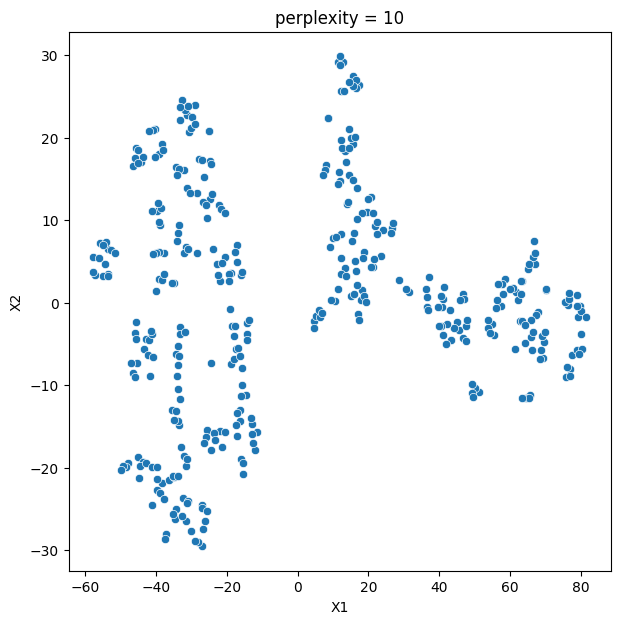

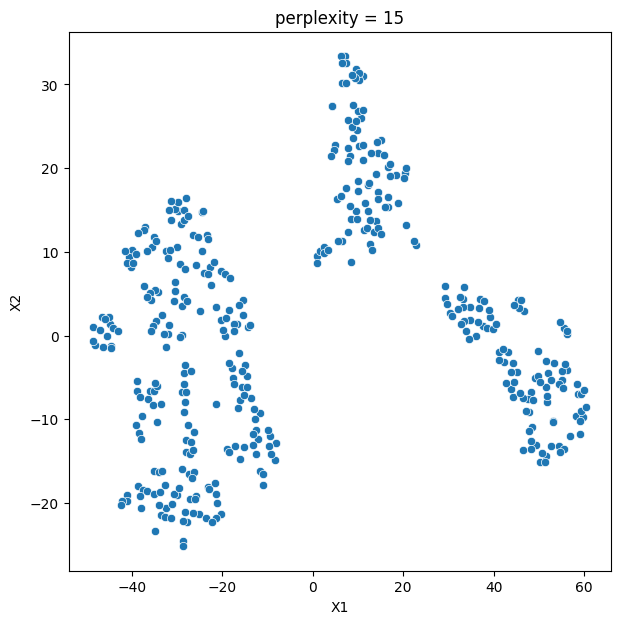

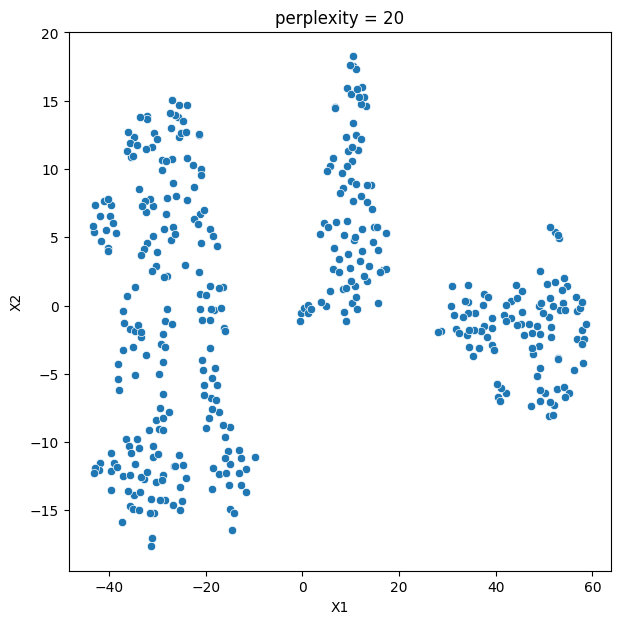

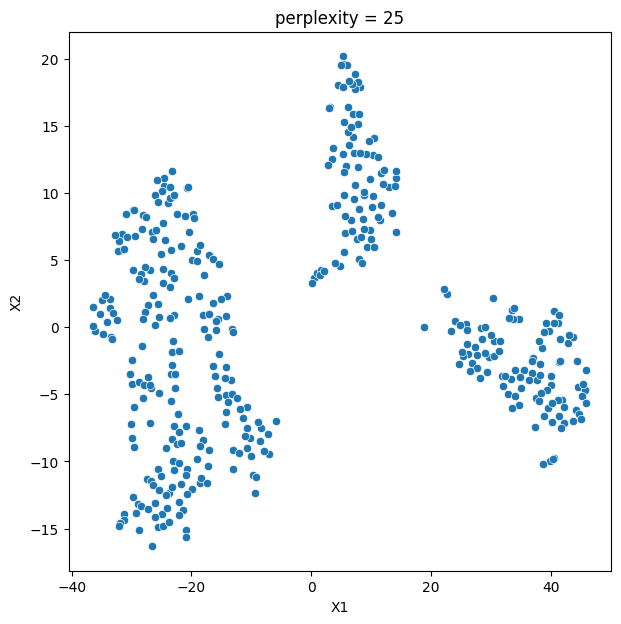

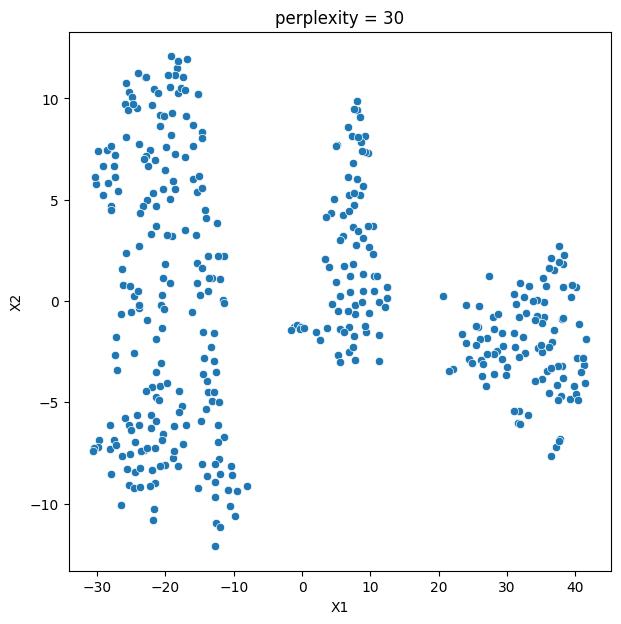

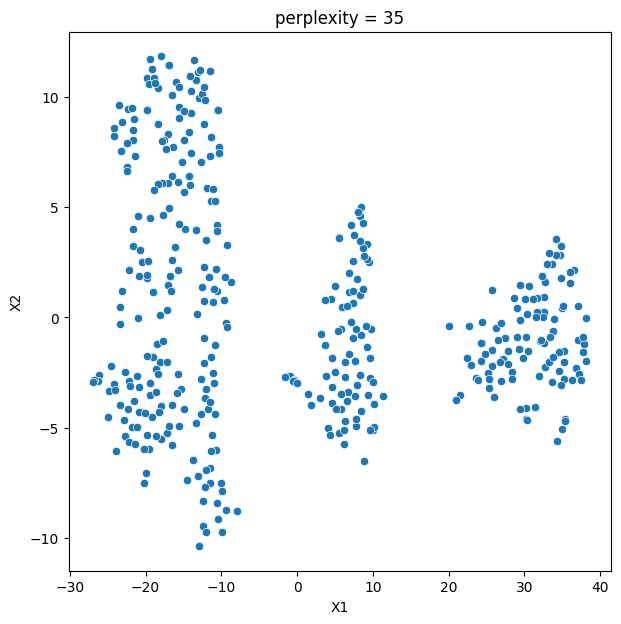

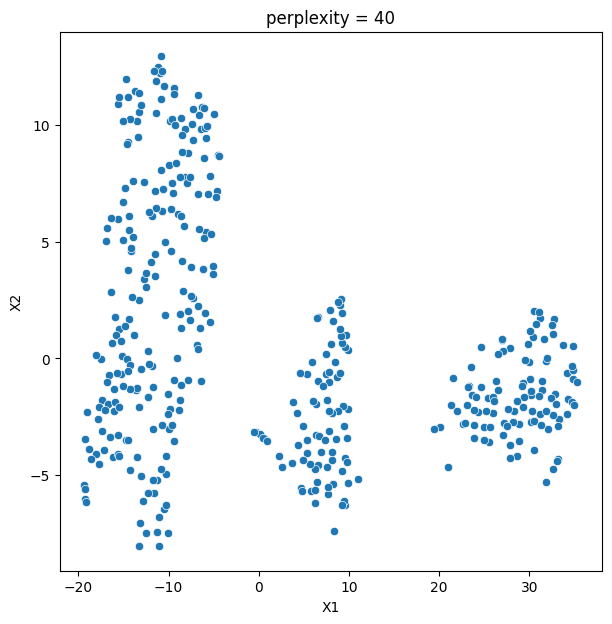

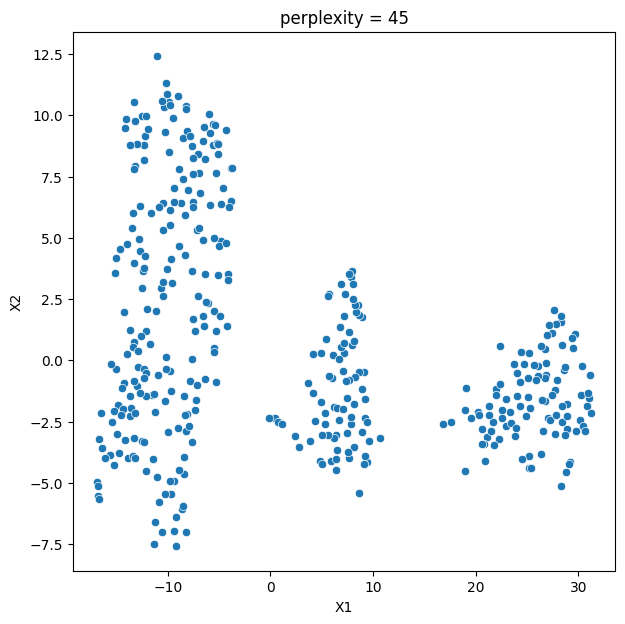

In [189]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)

    data_tsne = tsne.fit_transform(data_scaled)

    data_tsne = pd.DataFrame(data_tsne)

    data_tsne.columns = ['X1', 'X2']

    plt.figure(figsize = (7,7))

    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

    plt.title("perplexity = {}".format(i))

Perplexity of 20 seems to give nice group into 3 clear groups.

Let's visualize again with perplexity equal to 20.  

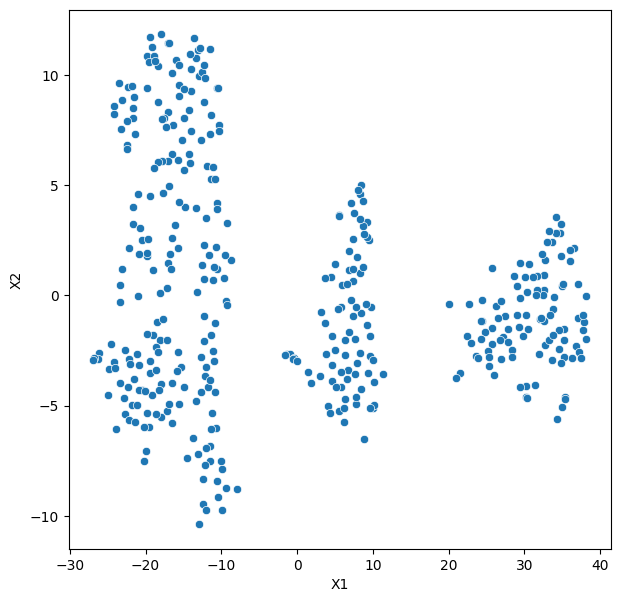

In [190]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)

data_tsne = tsne.fit_transform(data_scaled)

# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ["X1", "X2"])

# Scatter plot for two components
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

plt.show()

**Observations:**

* Very clearly seeing **3 groups in the data**.
* Let's label these **3 groups** using the values of the X1 and X2 axes.


In [191]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['X1']

    if first_component< -5:
      return 'group_1'

    elif first_component > 15:
      return 'group_3'

    else:
      return 'group_2'

In [192]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

<Axes: xlabel='X1', ylabel='X2'>

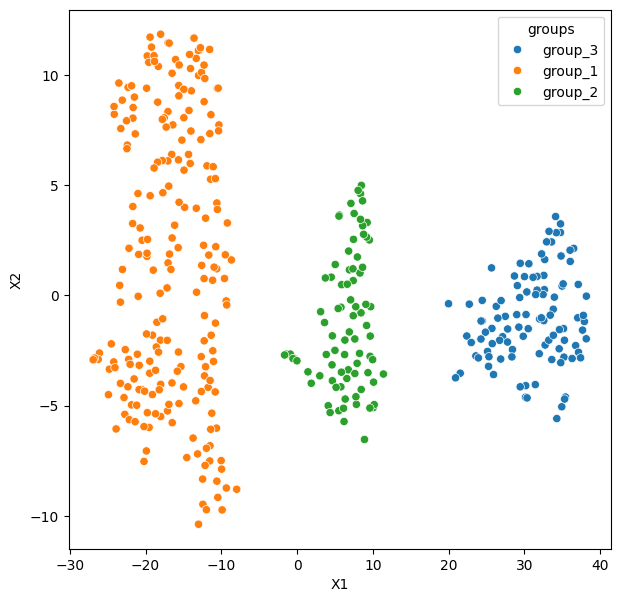

In [193]:
# Scatter plot for two components with hue
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne, hue = 'groups')

That nicely lines up in PCA-space.  I wonder what it would look like in the original features.  

<Axes: xlabel='horsepower', ylabel='displacement'>

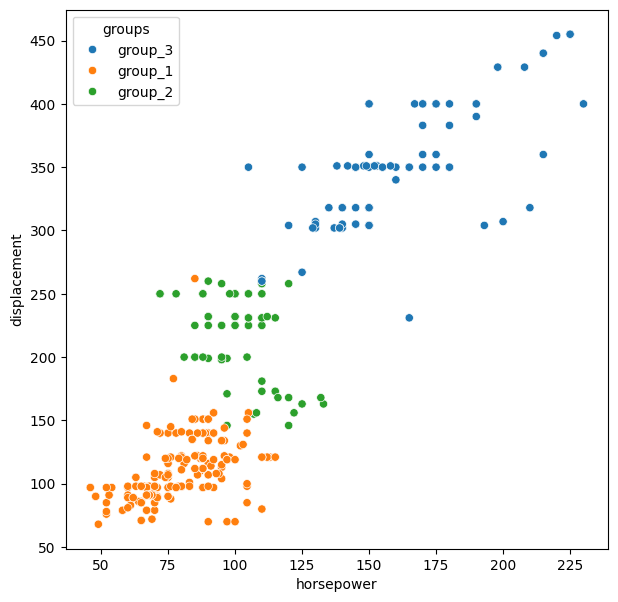

In [194]:
data['groups'] = data_tsne.apply(grouping, axis = 1)
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'horsepower', y = 'displacement', data = data, hue = 'groups')

It seems the PCA1 axis which defines the majority of the variance is a straightforward rotation along the correlated axes.  

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

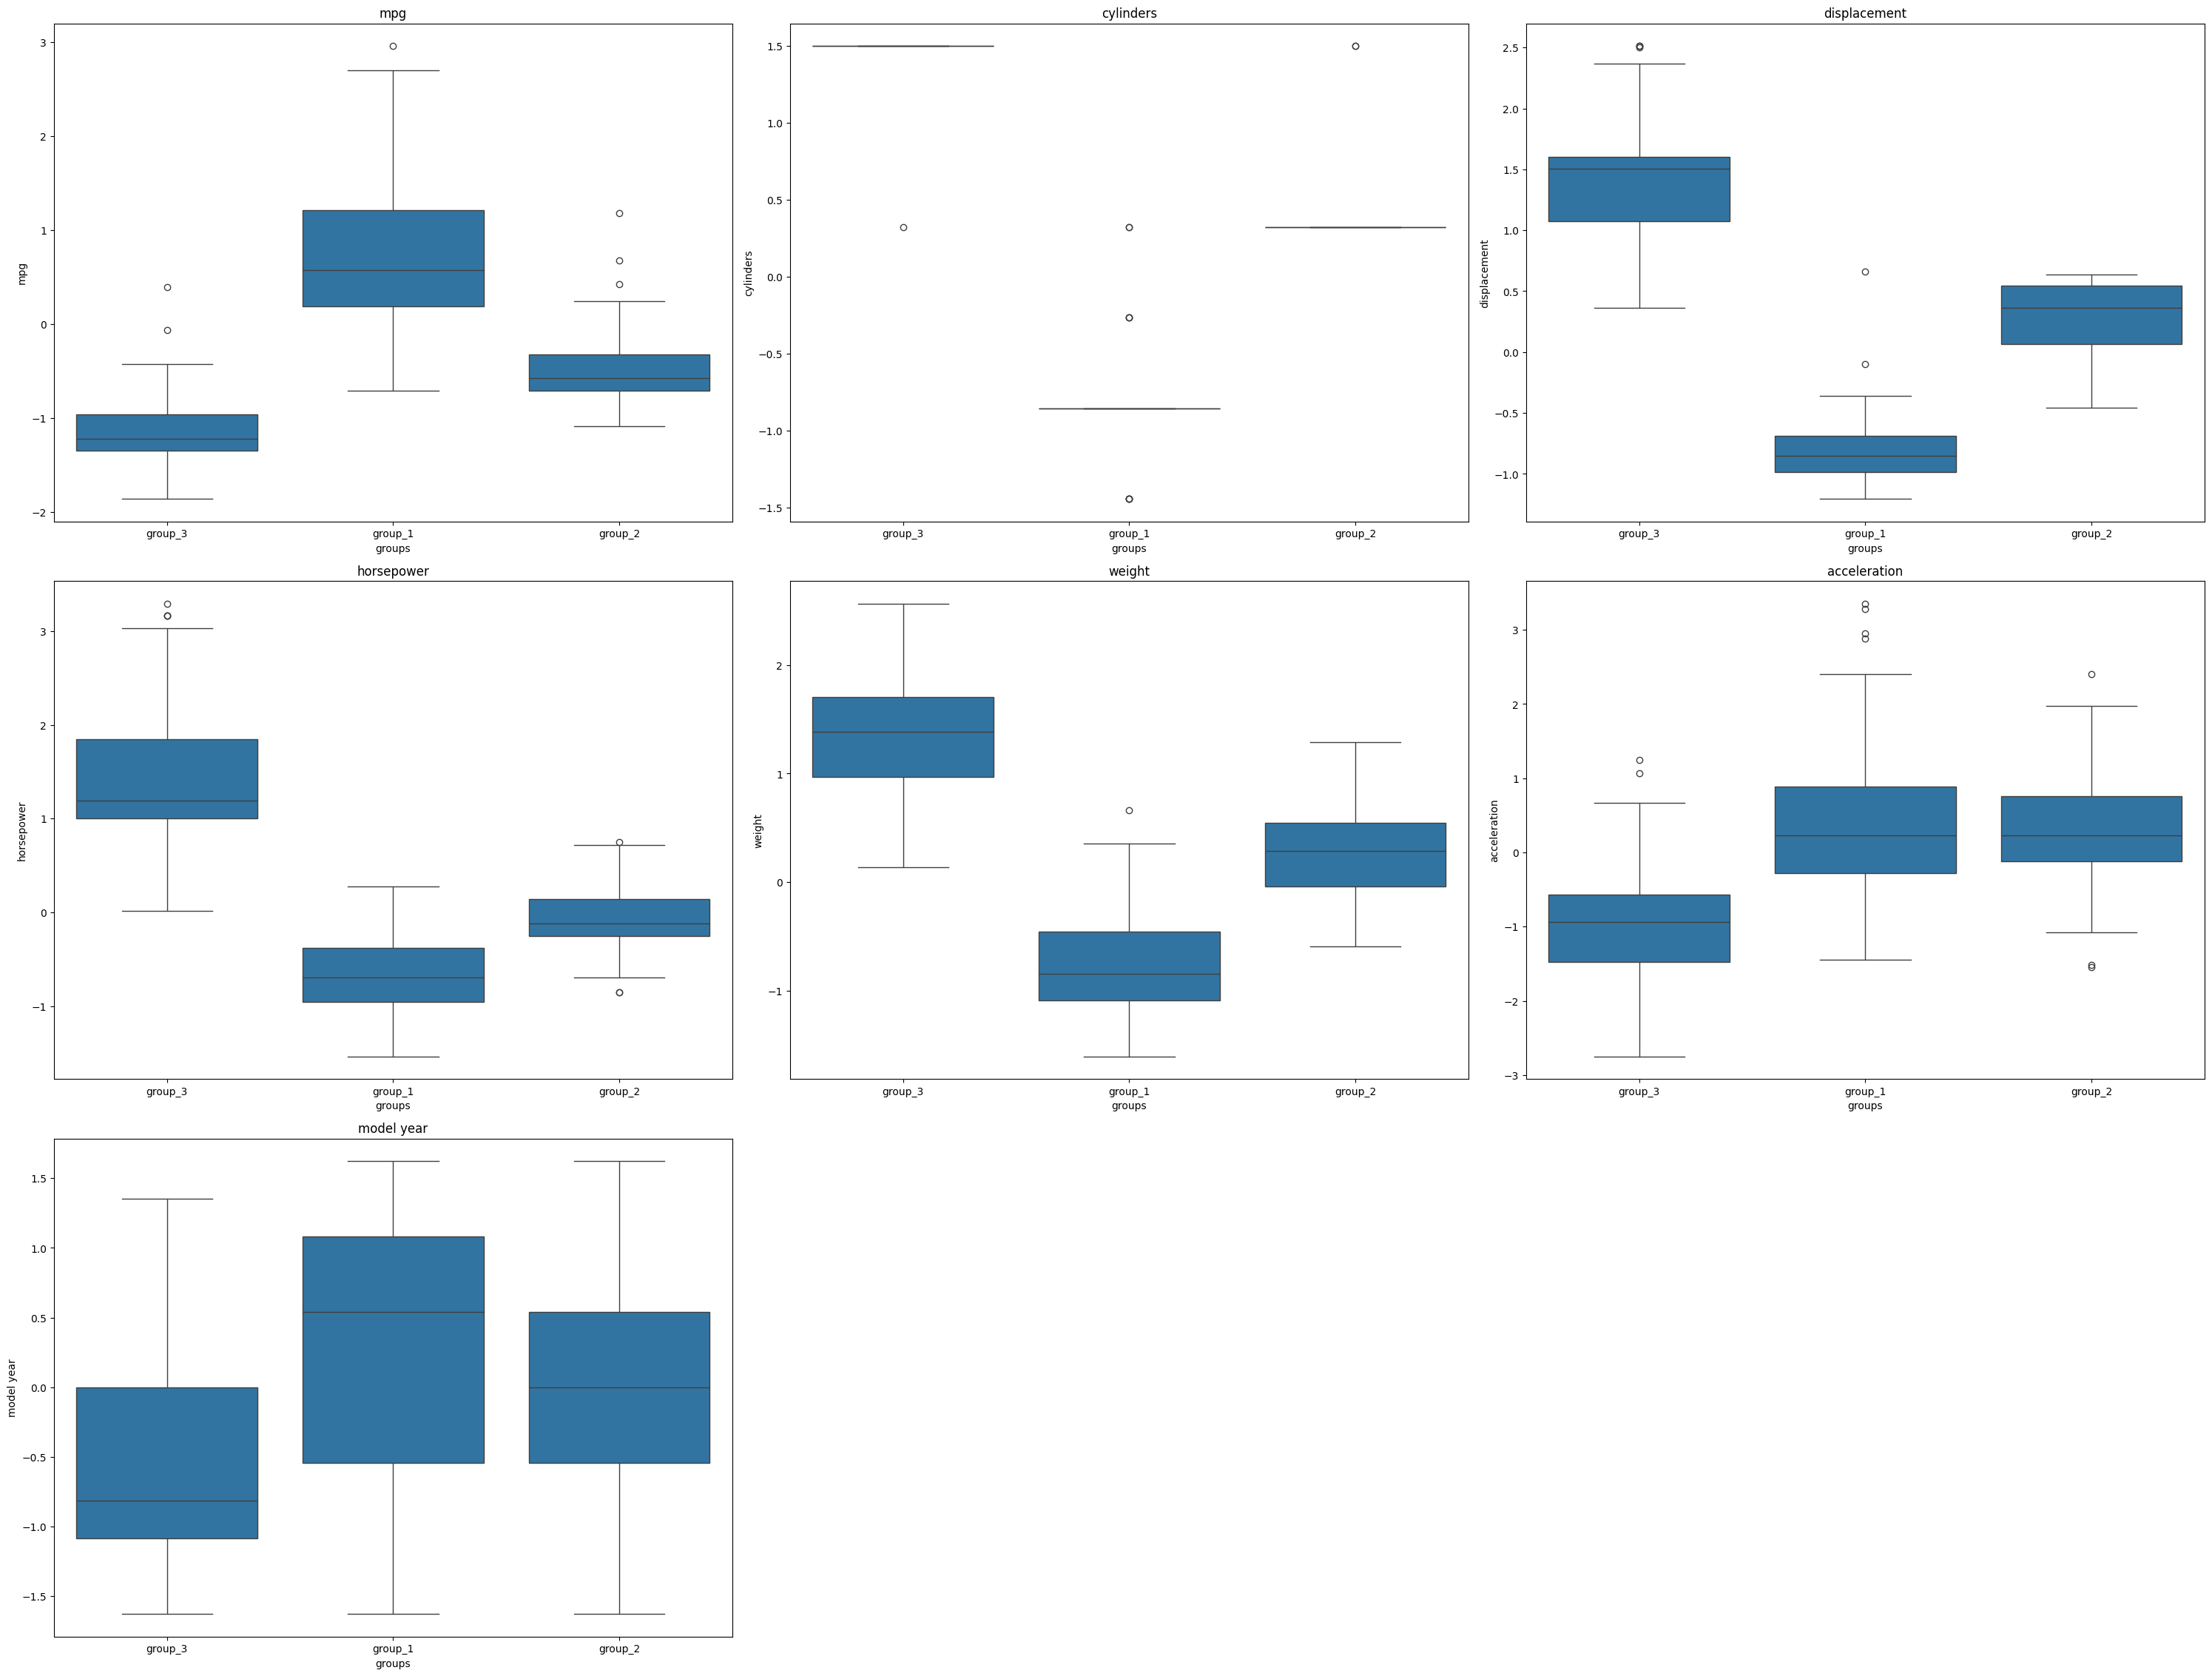

In [195]:
all_col = data_scaled.columns[:].tolist()

plt.figure(figsize = (30, 60))

for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)

    sns.boxplot(y=data_scaled[variable], x=data_tsne['groups'])

    plt.tight_layout()

    plt.title(variable)

plt.show()

In [291]:
#pulling out archetype cars
G1cars=data_scaled[(data_tsne['X1']> -19) & (data_tsne['X1']< -16) & (data_tsne['X2']>-4) & (data_tsne['X2']< 0)]
G2cars=data_scaled[(data_tsne['X1']>4) & (data_tsne['X1']< 6) & (data_tsne['X2']>-4) & (data_tsne['X2']< 0)]
G3cars=data_scaled[(data_tsne['X1']>28) & (data_tsne['X1']< 32) & (data_tsne['X2']>-4) & (data_tsne['X2']< 0)]
print(len(G1cars), len(G2cars), len(G3cars))

8 7 9


In [300]:
data_full.iloc[G1cars.index.tolist()].head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
245,36.1,4,98.0,66,1800,14.4,78,ford fiesta
293,31.9,4,89.0,71,1925,14.0,79,vw rabbit custom
295,35.7,4,98.0,80,1915,14.4,79,dodge colt hatchback custom


In [299]:
data_full.iloc[G2cars.index.tolist()].head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
191,22.0,6,225.0,100,3233,15.4,76,plymouth valiant
192,22.0,6,250.0,105,3353,14.5,76,chevrolet nova
254,20.2,6,200.0,85,2965,15.8,78,ford fairmont (auto)


In [295]:
data_full.iloc[G3cars.index.tolist()].head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
103,11.0,8,400.0,150,4997,14.0,73,chevrolet impala
136,16.0,8,302.0,140,4141,14.0,74,ford gran torino
137,13.0,8,350.0,150,4699,14.5,74,buick century luxus (sw)


**Observations:**

There are 3 groups, each with its own set of characteristics
* Group 1 is the subcompact economy cars, the Ford Fiestas, with smaller engines, slower acceleration, more popularly produced later in the time window studied.
* Group 3 is the Chevy Impalas and other muscle car, heavier cars, with larger engines, more popularly produced earlier in the given time window.  
* Group 2 shows cars in between these two groups, the compact cars like the Chevy Novas. Group 2 cars are about as slow as the Group 1 cars, except they are heavier and more powerful, and as a result get worse gas mileage than the Group 1 cars.  They were also made later in the dataset.
* The overall picture is that Group 3 muscle cars were gradually phased out and the remaining market segmented into Group 1, the subcompact economy and Group 2, which were the larger mid-sized cars.   

## **Actionable Insights and Recommendations**

Given that SecondLife is looking to determine how to segment their market, and the primary differences lie along gas mileage/engine size, I would suggest:

1. That the primary node of the decision tree in talking to customers is to determine whether fuel economy and compactness is a high priority factor to them.  If fuel economy is important, market cars from Group 1, the Ford Fiesta to them.  These cars should be reallocated to urban locations, where parking space is at a premium
2. Cars from Group 3, the muscle cars like the Chevy Impala, essentially ended in 1979.  Group 3 cars be pitched towards younger and more male customer sets.  *Feel the rush of the 1970s style and relive the energy of your youth.*
4. Group 2 cars, being larger and more powerful like the Chevy Nova, should be marketed towards older customers and should be accordingly relocated to suburban districts where customers need a large enough car to transport kids.

In [198]:
!pip install nbconvert

In [199]:
import nbconvert
import os
from nbconvert import HTMLExporter

In [200]:
exporter = nbconvert.HTMLExporter()

#exporter.export(nbconvert.read('/content/Learner_Notebook_PCA_and_tSNE_Project_FullCode_version (1).ipynb'))
#output_file = os.path.basename('/content/Learner_Notebook_PCA_and_tSNE_Project_FullCode_version.ipynb').split('.')[0] + '.html'

#exporter.from_filename('/content/Learner_Notebook_PCA_and_tSNE_Project_FullCode_version (1).ipynb', output_file=output_file)

In [201]:
#%%shell
#jupyter nbconvert --to html /content/Learner_Notebook_PCA_and_tSNE_Project_FullCode_version.ipynb